In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Kenya World Bank Data (2013-2022).xlsx')
df.head()

,Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kenya World Bank Data (2013-2022),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Series Name,Series Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,90.858,86.955,81.426,76.813,72.354,71.298,69.578,64.939,64.185,..


In [3]:
df = df.transpose() # Transpose the dataframe ie rows to columns and columns to rows
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#,NaN,Kenya World Bank Data (2013-2022),NaN,Series Name,"Adolescent fertility rate (births per 1,000 wo...","Agriculture, forestry, and fishing, value adde...","Annual freshwater withdrawals, total (% of int...",Births attended by skilled health staff (% of ...,CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of mar...",...,"School enrollment, primary (% gross)","School enrollment, primary and secondary (gros...","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (...,Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of t...,Time required to start a business (days),"Total debt service (% of exports of goods, ser...",Urban population growth (annual %)
Unnamed: 1,NaN,NaN,NaN,Series Code,SP.ADO.TFRT,NV.AGR.TOTL.ZS,ER.H2O.FWTL.ZS,SH.STA.BRTC.ZS,EN.ATM.CO2E.PC,SP.DYN.CONU.ZS,...,SE.PRM.ENRR,SE.ENR.PRSC.FM.ZS,SE.SEC.ENRR,IQ.SCI.OVRL,AG.SRF.TOTL.K2,GC.TAX.TOTL.GD.ZS,ER.PTD.TOTL.ZS,IC.REG.DURS,DT.TDS.DECT.EX.ZS,SP.URB.GROW
Unnamed: 2,NaN,NaN,NaN,2013,90.858,18.616552,15.551691,..,0.321209,..,...,..,..,..,52.222222,580370,..,..,34,4.730759,4.110203
Unnamed: 3,NaN,NaN,NaN,2014,86.955,18.347839,15.553623,61.8,0.364375,58,...,105.75341,..,..,54.444444,580370,15.187021,..,32,11.362005,4.001703
Unnamed: 4,NaN,NaN,NaN,2015,81.426,19.469615,15.555556,..,0.38612,64.1,...,103.661568,..,..,54.444433,580370,14.839483,..,28,8.330047,3.918169


In [4]:
df.columns = df.iloc[0] # Set the first row as the column names
df = df[1:] # Remove the first row
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#,NaN,Kenya World Bank Data (2013-2022),NaN,Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",...,"School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
Unnamed: 1,NaN,NaN,NaN,Series Code,SP.ADO.TFRT,NV.AGR.TOTL.ZS,ER.H2O.FWTL.ZS,SH.STA.BRTC.ZS,EN.ATM.CO2E.PC,SP.DYN.CONU.ZS,...,SE.PRM.ENRR,SE.ENR.PRSC.FM.ZS,SE.SEC.ENRR,IQ.SCI.OVRL,AG.SRF.TOTL.K2,GC.TAX.TOTL.GD.ZS,ER.PTD.TOTL.ZS,IC.REG.DURS,DT.TDS.DECT.EX.ZS,SP.URB.GROW
Unnamed: 2,NaN,NaN,NaN,2013,90.858,18.616552,15.551691,..,0.321209,..,...,..,..,..,52.222222,580370,..,..,34,4.730759,4.110203
Unnamed: 3,NaN,NaN,NaN,2014,86.955,18.347839,15.553623,61.8,0.364375,58,...,105.75341,..,..,54.444444,580370,15.187021,..,32,11.362005,4.001703
Unnamed: 4,NaN,NaN,NaN,2015,81.426,19.469615,15.555556,..,0.38612,64.1,...,103.661568,..,..,54.444433,580370,14.839483,..,28,8.330047,3.918169
Unnamed: 5,NaN,NaN,NaN,2016,76.813,20.034516,19.478261,70.2,0.403178,61.2,...,103.205337,..,..,55.555533,580370,14.966473,10.505021,22,11.173638,3.929292


# Exploratory Data Analysis

In [5]:
# Remove all NaN values
df = df.dropna(axis=0, how='all')
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#,NaN,Kenya World Bank Data (2013-2022),NaN,Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",...,"School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
Unnamed: 1,NaN,NaN,NaN,Series Code,SP.ADO.TFRT,NV.AGR.TOTL.ZS,ER.H2O.FWTL.ZS,SH.STA.BRTC.ZS,EN.ATM.CO2E.PC,SP.DYN.CONU.ZS,...,SE.PRM.ENRR,SE.ENR.PRSC.FM.ZS,SE.SEC.ENRR,IQ.SCI.OVRL,AG.SRF.TOTL.K2,GC.TAX.TOTL.GD.ZS,ER.PTD.TOTL.ZS,IC.REG.DURS,DT.TDS.DECT.EX.ZS,SP.URB.GROW
Unnamed: 2,NaN,NaN,NaN,2013,90.858,18.616552,15.551691,..,0.321209,..,...,..,..,..,52.222222,580370,..,..,34,4.730759,4.110203
Unnamed: 3,NaN,NaN,NaN,2014,86.955,18.347839,15.553623,61.8,0.364375,58,...,105.75341,..,..,54.444444,580370,15.187021,..,32,11.362005,4.001703
Unnamed: 4,NaN,NaN,NaN,2015,81.426,19.469615,15.555556,..,0.38612,64.1,...,103.661568,..,..,54.444433,580370,14.839483,..,28,8.330047,3.918169
Unnamed: 5,NaN,NaN,NaN,2016,76.813,20.034516,19.478261,70.2,0.403178,61.2,...,103.205337,..,..,55.555533,580370,14.966473,10.505021,22,11.173638,3.929292


In [6]:
pd.set_option('display.max_columns', None) # Display all columns
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#,NaN,Kenya World Bank Data (2013-2022),NaN,Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"External debt stocks, total (DOD, current US$)","Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","GNI, Atlas method (current US$)","GNI, PPP (current international $)",Gross capital formation (% of GDP),High-technology exports (% of manufactured exports),"Immunization, measles (% of children ages 12-23 months)",Imports of goods and services (% of GDP),Income share held by lowest 20%,"Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net barter terms of trade index (2015 = 100),Net migration,Net official development assistance and official aid received (current US$),"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)","Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)","Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
Unnamed: 1,NaN,NaN,NaN,Series Code,SP.ADO.TFRT,NV.AGR.TOTL.ZS,ER.H2O.FWTL.ZS,SH.STA.BRTC.ZS,EN.ATM.CO2E.PC,SP.DYN.CONU.ZS,FS.AST.DOMS.GD.ZS,EG.USE.ELEC.KH.PC,EG.USE.PCAP.KG.OE,NE.EXP.GNFS.ZS,DT.DOD.DECT.CD,SP.DYN.TFRT.IN,BX.KLT.DINV.CD.WD,AG.LND.FRST.K2,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GNP.PCAP.CD,NY.GNP.PCAP.PP.CD,NY.GNP.ATLS.CD,NY.GNP.MKTP.PP.CD,NE.GDI.TOTL.ZS,TX.VAL.TECH.MF.ZS,SH.IMM.MEAS,NE.IMP.GNFS.ZS,SI.DST.FRST.20,NV.IND.TOTL.ZS,NY.GDP.DEFL.KD.ZG,SP.DYN.LE00.IN,TG.VAL.TOTL.GD.ZS,MS.MIL.XPND.GD.ZS,IT.CEL.SETS.P2,SH.DYN.MORT,TT.PRI.MRCH.XD.WD,SM.POP.NETM,DT.ODA.ALLD.CD,BX.TRF.PWKR.CD.DT,EN.POP.DNST,SP.POP.GROW,SP.POP.TOTL,SI.POV.DDAY,SI.POV.NAHC,SH.DYN.AIDS.ZS,SH.STA.MALN.ZS,SE.PRM.CMPT.ZS,GC.REV.XGRT.GD.ZS,SE.PRM.ENRR,SE.ENR.PRSC.FM.ZS,SE.SEC.ENRR,IQ.SCI.OVRL,AG.SRF.TOTL.K2,GC.TAX.TOTL.GD.ZS,ER.PTD.TOTL.ZS,IC.REG.DURS,DT.TDS.DECT.EX.ZS,SP.URB.GROW
Unnamed: 2,NaN,NaN,NaN,2013,90.858,18.616552,15.551691,..,0.321209,..,..,163.599299,476.249235,17.792181,13775500739,3.952,1118825000,35599.82,61671440481,3.797848,1130,2780,50624928759,124600000000,22.404968,4.068781,94,29.672462,..,19.080259,7.337562,61.389,36.019914,1.395397,71.06122,50.1,87.652885,-57630,3306840088,1304277231,78.701845,2.409931,44792368,..,..,5.3,..,..,..,..,..,..,52.222222,580370,..,..,34,4.730759,4.110203
Unn

In [7]:
df = df.drop(df.index[0]) # drop the first row at index 0
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#,NaN,Kenya World Bank Data (2013-2022),NaN,Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"External debt stocks, total (DOD, current US$)","Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","GNI, Atlas method (current US$)","GNI, PPP (current international $)",Gross capital formation (% of GDP),High-technology exports (% of manufactured exports),"Immunization, measles (% of children ages 12-23 months)",Imports of goods and services (% of GDP),Income share held by lowest 20%,"Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net barter terms of trade index (2015 = 100),Net migration,Net official development assistance and official aid received (current US$),"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)","Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)","Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
Unnamed: 2,NaN,NaN,NaN,2013,90.858,18.616552,15.551691,..,0.321209,..,..,163.599299,476.249235,17.792181,13775500739,3.952,1118825000,35599.82,61671440481,3.797848,1130,2780,50624928759,124600000000,22.404968,4.068781,94,29.672462,..,19.080259,7.337562,61.389,36.019914,1.395397,71.06122,50.1,87.652885,-57630,3306840088,1304277231,78.701845,2.409931,44792368,..,..,5.3,..,..,..,..,..,..,52.222222,580370,..,..,34,4.730759,4.110203
Unnamed: 3,NaN,NaN,NaN,2014,86.955,18.347839,15.553623,61.8,0.364375,58,..,167.438099,515.581682,16.472804,16911742537,3.844,820937598.4,35411.96,68285796663,5.020111,1260,3040,57582713354,139107000000,24.950719,..,95,29.697685,..,19.036033,7.635032,61.816,35.894727,1.199433,73.382638,48.1,88.37758,-72415,2661030029,1440846250,80.528276,2.294178,45831863,..,..,5.2,11.2,97.200996,19.562106,105.75341,..,..,54.444444,580370,15.187021,..,32,11.362005,4.001703
Unnamed: 4,NaN,NaN,NaN,2015,81.426,19.469615,15.555556,..,0.38612,64.1,..,..,..,15.128734,19783760502,3.8,619724465,35224.1,70120446664,4.967721,1330,3390,62095754504,158922000000,22.103398,4.365946,96,25.198651,6.2,18.894046,9.238655,61.892,31.37316,1.203169,80.501059,45.9,100,-95981,2463560059,1569267850,82.319795,2.200322,46851488,29.4,36.1,5,..,99.143402,19.351543,103.661568,..,..,54.444433,580370,14.8394

In [8]:
df = df.dropna(axis=0, how='all')
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#,NaN,Kenya World Bank Data (2013-2022),NaN,Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"External debt stocks, total (DOD, current US$)","Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","GNI, Atlas method (current US$)","GNI, PPP (current international $)",Gross capital formation (% of GDP),High-technology exports (% of manufactured exports),"Immunization, measles (% of children ages 12-23 months)",Imports of goods and services (% of GDP),Income share held by lowest 20%,"Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net barter terms of trade index (2015 = 100),Net migration,Net official development assistance and official aid received (current US$),"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)","Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)","Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
Unnamed: 2,NaN,NaN,NaN,2013,90.858,18.616552,15.551691,..,0.321209,..,..,163.599299,476.249235,17.792181,13775500739,3.952,1118825000,35599.82,61671440481,3.797848,1130,2780,50624928759,124600000000,22.404968,4.068781,94,29.672462,..,19.080259,7.337562,61.389,36.019914,1.395397,71.06122,50.1,87.652885,-57630,3306840088,1304277231,78.701845,2.409931,44792368,..,..,5.3,..,..,..,..,..,..,52.222222,580370,..,..,34,4.730759,4.110203
Unnamed: 3,NaN,NaN,NaN,2014,86.955,18.347839,15.553623,61.8,0.364375,58,..,167.438099,515.581682,16.472804,16911742537,3.844,820937598.4,35411.96,68285796663,5.020111,1260,3040,57582713354,139107000000,24.950719,..,95,29.697685,..,19.036033,7.635032,61.816,35.894727,1.199433,73.382638,48.1,88.37758,-72415,2661030029,1440846250,80.528276,2.294178,45831863,..,..,5.2,11.2,97.200996,19.562106,105.75341,..,..,54.444444,580370,15.187021,..,32,11.362005,4.001703
Unnamed: 4,NaN,NaN,NaN,2015,81.426,19.469615,15.555556,..,0.38612,64.1,..,..,..,15.128734,19783760502,3.8,619724465,35224.1,70120446664,4.967721,1330,3390,62095754504,158922000000,22.103398,4.365946,96,25.198651,6.2,18.894046,9.238655,61.892,31.37316,1.203169,80.501059,45.9,100,-95981,2463560059,1569267850,82.319795,2.200322,46851488,29.4,36.1,5,..,99.143402,19.351543,103.661568,..,..,54.444433,580370,14.8394

In [9]:
# Drop the first column
df = df.drop(df.columns[0], axis=1)
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#,Kenya World Bank Data (2013-2022),Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"External debt stocks, total (DOD, current US$)","Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","GNI, Atlas method (current US$)","GNI, PPP (current international $)",Gross capital formation (% of GDP),High-technology exports (% of manufactured exports),"Immunization, measles (% of children ages 12-23 months)",Imports of goods and services (% of GDP),Income share held by lowest 20%,"Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net barter terms of trade index (2015 = 100),Net migration,Net official development assistance and official aid received (current US$),"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)","Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)","Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
Unnamed: 2,NaN,2013,90.858,18.616552,15.551691,..,0.321209,..,..,163.599299,476.249235,17.792181,13775500739,3.952,1118825000,35599.82,61671440481,3.797848,1130,2780,50624928759,124600000000,22.404968,4.068781,94,29.672462,..,19.080259,7.337562,61.389,36.019914,1.395397,71.06122,50.1,87.652885,-57630,3306840088,1304277231,78.701845,2.409931,44792368,..,..,5.3,..,..,..,..,..,..,52.222222,580370,..,..,34,4.730759,4.110203
Unnamed: 3,NaN,2014,86.955,18.347839,15.553623,61.8,0.364375,58,..,167.438099,515.581682,16.472804,16911742537,3.844,820937598.4,35411.96,68285796663,5.020111,1260,3040,57582713354,139107000000,24.950719,..,95,29.697685,..,19.036033,7.635032,61.816,35.894727,1.199433,73.382638,48.1,88.37758,-72415,2661030029,1440846250,80.528276,2.294178,45831863,..,..,5.2,11.2,97.200996,19.562106,105.75341,..,..,54.444444,580370,15.187021,..,32,11.362005,4.001703
Unnamed: 4,NaN,2015,81.426,19.469615,15.555556,..,0.38612,64.1,..,..,..,15.128734,19783760502,3.8,619724465,35224.1,70120446664,4.967721,1330,3390,62095754504,158922000000,22.103398,4.365946,96,25.198651,6.2,18.894046,9.238655,61.892,31.37316,1.203169,80.501059,45.9,100,-95981,2463560059,1569267850,82.319795,2.200322,46851488,29.4,36.1,5,..,99.143402,19.351543,103.661568,..,..,54.444433,580370,14.839483,..,28,8.330047,3.918169
Unnam

In [11]:
# Rename columns
df = df.rename(columns={'Series Name': 'Year'})
df = df.replace('..', 0.0)

df = df.drop(df.columns[0], axis=1)

df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"External debt stocks, total (DOD, current US$)","Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","GNI, Atlas method (current US$)","GNI, PPP (current international $)",Gross capital formation (% of GDP),High-technology exports (% of manufactured exports),"Immunization, measles (% of children ages 12-23 months)",Imports of goods and services (% of GDP),Income share held by lowest 20%,"Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net barter terms of trade index (2015 = 100),Net migration,Net official development assistance and official aid received (current US$),"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)","Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)","Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
Unnamed: 2,2013,90.858,18.616552,15.551691,0.0,0.321209,0.0,0.0,163.599299,476.249235,17.792181,1.377550e+10,3.952,1.118825e+09,35599.82,61671440481,3.797848,1130,2780,50624928759,124600000000,22.404968,4.068781,94.0,29.672462,0.0,19.080259,7.337562,61.389,36.019914,1.395397,71.061220,50.1,87.652885,-57630.0,3.306840e+09,1304277231,78.701845,2.409931,44792368,0.0,0.0,5.3,0.0,0.000000,0.000000,0.000000,0.0,0.0,52.222222,580370.0,0.000000,0.000000,34.0,4.730759,4.110203
Unnamed: 3,2014,86.955,18.347839,15.553623,61.8,0.364375,58.0,0.0,167.438099,515.581682,16.472804,1.691174e+10,3.844,8.209376e+08,35411.96,68285796663,5.020111,1260,3040,57582713354,139107000000,24.950719,0.000000,95.0,29.697685,0.0,19.036033,7.635032,61.816,35.894727,1.199433,73.382638,48.1,88.377580,-72415.0,2.661030e+09,1440846250,80.528276,2.294178,45831863,0.0,0.0,5.2,11.2,97.200996,19.562106,105.753410,0.0,0.0,54.444444,580370.0,15.187021,0.000000,32.0,11.362005,4.001703
Unnamed: 4,2015,81.426,19.469615,15.555556,0.0,0.386120,64.1,0.0,0.000000,0.000000,15.128734,1.978376e+10,3.800,6.197245e+08,35224.10,70120446664,4.967721,1330,3390,62095754504,158922000000,22.103398,4.365946,96.0,25.198651,6.2,18.894046,9.238655,61.892,31.373160,1.203169,80.501059,45.9,100.000000,-95981.0,2.463560e+09,1569267850,82.319795,2.200322,46851488,29.4,36.1,5.0,0.0,99.143402,19.351543,

In [12]:
df.columns.name = None # Remove the column name
df.columns

Index(['Year', 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Births attended by skilled health staff (% of total)',
       'CO2 emissions (metric tons per capita)',
       'Contraceptive prevalence, any method (% of married women ages 15-49)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'External debt stocks, total (DOD, current US$)',
       'Fertility rate, total (births per woman)',
       'Foreign direct investment, net inflows (BoP, current US$)',
       'Forest area (sq. km)', 'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',

In [13]:
print("The dataframe has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("The dataframe has {} missing values".format(df.isnull().sum().sum()))
print('The dataframe has {} duplicated values'.format(df.duplicated().sum()))

The dataframe has 10 rows and 56 columns
The dataframe has 0 missing values
The dataframe has 0 duplicated values


In [14]:
df.reset_index(drop=True, inplace=True) # remove the index column

In [15]:
df.to_csv('Kenya World Bank Data (2013-2022).csv', index=False)

## Visualizations

In [16]:
df.head()

,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"External debt stocks, total (DOD, current US$)","Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","GNI, Atlas method (current US$)","GNI, PPP (current international $)",Gross capital formation (% of GDP),High-technology exports (% of manufactured exports),"Immunization, measles (% of children ages 12-23 months)",Imports of goods and services (% of GDP),Income share held by lowest 20%,"Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net barter terms of trade index (2015 = 100),Net migration,Net official development assistance and official aid received (current US$),"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)","Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)","Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
0,2013,90.858,18.616552,15.551691,0.0,0.321209,0.0,0.0,163.599299,476.249235,17.792181,1.377550e+10,3.952,1.118825e+09,35599.82,61671440481,3.797848,1130,2780,50624928759,124600000000,22.404968,4.068781,94.0,29.672462,0.0,19.080259,7.337562,61.389,36.019914,1.395397,71.061220,50.1,87.652885,-57630.0,3.306840e+09,1304277231,78.701845,2.409931,44792368,0.0,0.0,5.3,0.0,0.000000,0.000000,0.000000,0.0,0.0,52.222222,580370.0,0.000000,0.000000,34.0,4.730759,4.110203
1,2014,86.955,18.347839,15.553623,61.8,0.364375,58.0,0.0,167.438099,515.581682,16.472804,1.691174e+10,3.844,8.209376e+08,35411.96,68285796663,5.020111,1260,3040,57582713354,139107000000,24.950719,0.000000,95.0,29.697685,0.0,19.036033,7.635032,61.816,35.894727,1.199433,73.382638,48.1,88.377580,-72415.0,2.661030e+09,1440846250,80.528276,2.294178,45831863,0.0,0.0,5.2,11.2,97.200996,19.562106,105.753410,0.0,0.0,54.444444,580370.0,15.187021,0.000000,32.0,11.362005,4.001703
2,2015,81.426,19.469615,15.555556,0.0,0.386120,64.1,0.0,0.000000,0.000000,15.128734,1.978376e+10,3.800,6.197245e+08,35224.10,70120446664,4.967721,1330,3390,62095754504,158922000000,22.103398,4.365946,96.0,25.198651,6.2,18.894046,9.238655,61.892,31.373160,1.203169,80.501059,45.9,100.000000,-95981.0,2.463560e+09,1569267850,82.319795,2.200322,46851488,29.4,36.1,5.0,0.0,99.143402,19.351543,103.661568,0.0,0.0,54.444433,580370.0,14.839483,0.000000,28.0,8.330047,3.918169
3,2016,76.813,20.034516,19.478261

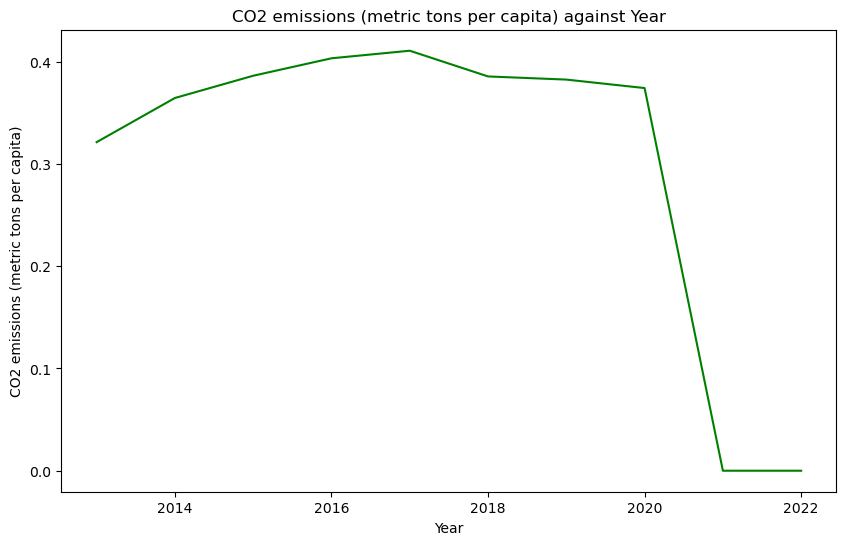

In [17]:
# CO2 emissions (metric tons per capita) against Year
#df['CO2 emissions (metric tons per capita)'] = df['CO2 emissions (metric tons per capita)'].astype(float)
#df['Year'] = df['Year'].astype(int)

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['CO2 emissions (metric tons per capita)'], color='green')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('CO2 emissions (metric tons per capita) against Year')
plt.show();

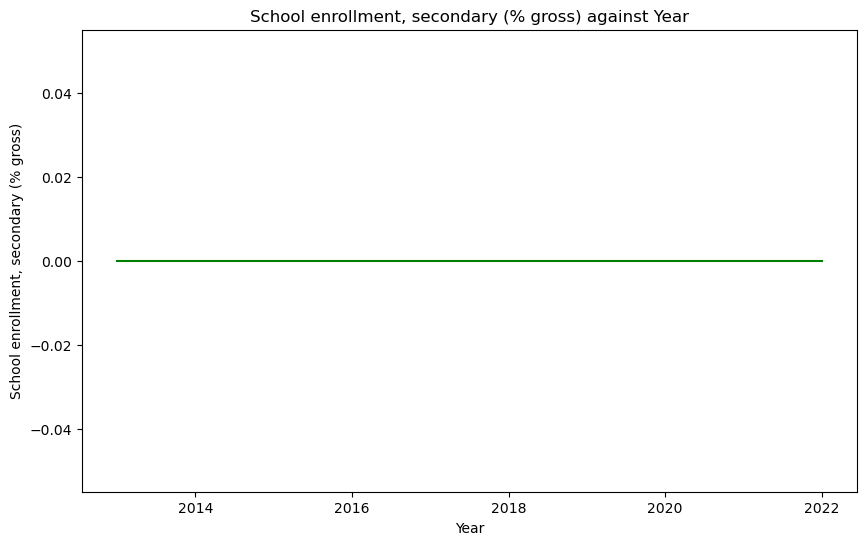

In [18]:
# School enrollment, secondary (% gross) against Year
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['School enrollment, secondary (% gross)'], color='green')
plt.xlabel('Year')
plt.ylabel('School enrollment, secondary (% gross)')
plt.title('School enrollment, secondary (% gross) against Year')
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


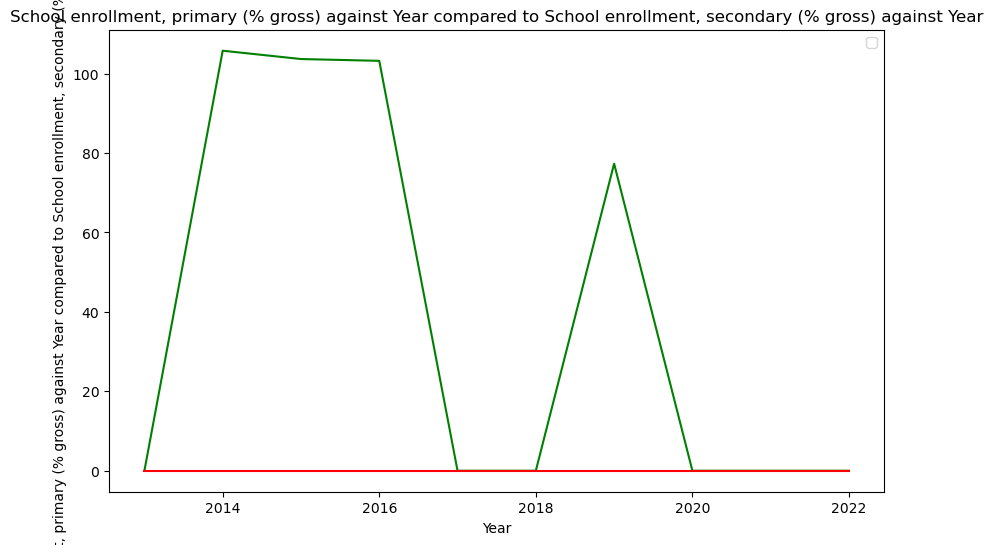

In [19]:
# School enrollment, primary (% gross) against Year compared to School enrollment, secondary (% gross) against Year
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['School enrollment, primary (% gross)'], color='green')
plt.plot(df['Year'], df['School enrollment, secondary (% gross)'], color='red')
plt.xlabel('Year')
plt.ylabel('School enrollment, primary (% gross) against Year compared to School enrollment, secondary (% gross) against Year')
plt.title('School enrollment, primary (% gross) against Year compared to School enrollment, secondary (% gross) against Year')
plt.legend()
plt.show();

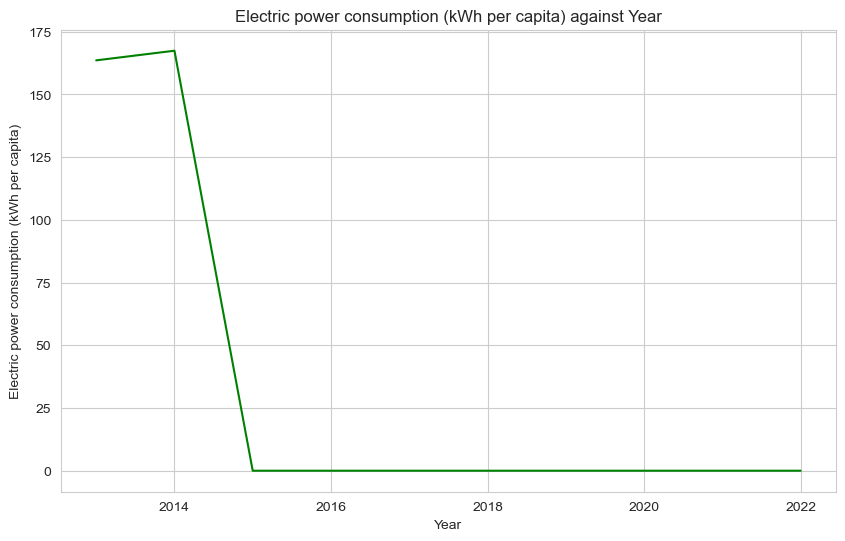

In [20]:
# Electric power consumption (kWh per capita) against Year
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Electric power consumption (kWh per capita)'], color='green')
plt.xlabel('Year')
plt.ylabel('Electric power consumption (kWh per capita)')
plt.title('Electric power consumption (kWh per capita) against Year')
plt.show();

# Modelling

In [23]:
import random

# Generate a list of unique random integers
unique_randoms = list(range(1, df.size + 1))  # df.size gives the total number of elements in the dataframe
random.shuffle(unique_randoms)

# Define a function to replace 0.0 with a unique random integer
def replace_zero(val):
    if val == 0.0:
        return unique_randoms.pop()  # pop() removes and returns the last item in the list
    else:
        return val

# Apply the function to the dataframe
df = df.applymap(replace_zero)
df.head()

,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"External debt stocks, total (DOD, current US$)","Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","GNI, Atlas method (current US$)","GNI, PPP (current international $)",Gross capital formation (% of GDP),High-technology exports (% of manufactured exports),"Immunization, measles (% of children ages 12-23 months)",Imports of goods and services (% of GDP),Income share held by lowest 20%,"Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net barter terms of trade index (2015 = 100),Net migration,Net official development assistance and official aid received (current US$),"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)","Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)","Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Statistical Capacity Score (Overall Average) (scale 0 - 100),Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
0,2013,90.858,18.616552,15.551691,53.0,0.321209,14.0,5.0,163.599299,476.249235,17.792181,1.377550e+10,3.952,1.118825e+09,35599.82,61671440481,3.797848,1130,2780,50624928759,124600000000,22.404968,4.068781,94.0,29.672462,12.0,19.080259,7.337562,61.389,36.019914,1.395397,71.061220,50.1,87.652885,-57630.0,3.306840e+09,1304277231,78.701845,2.409931,44792368,38.0,56.0,5.3,62.0,34.000000,61.000000,5.000000,99.0,40.0,52.222222,580370.0,62.000000,27.000000,34.0,4.730759,4.110203
1,2014,86.955,18.347839,15.553623,61.8,0.364375,58.0,5.0,167.438099,515.581682,16.472804,1.691174e+10,3.844,8.209376e+08,35411.96,68285796663,5.020111,1260,3040,57582713354,139107000000,24.950719,1.000000,95.0,29.697685,12.0,19.036033,7.635032,61.816,35.894727,1.199433,73.382638,48.1,88.377580,-72415.0,2.661030e+09,1440846250,80.528276,2.294178,45831863,38.0,56.0,5.2,11.2,97.200996,19.562106,105.753410,99.0,40.0,54.444444,580370.0,15.187021,27.000000,32.0,11.362005,4.001703
2,2015,81.426,19.469615,15.555556,53.0,0.386120,64.1,5.0,49.000000,69.000000,15.128734,1.978376e+10,3.800,6.197245e+08,35224.10,70120446664,4.967721,1330,3390,62095754504,158922000000,22.103398,4.365946,96.0,25.198651,6.2,18.894046,9.238655,61.892,31.373160,1.203169,80.501059,45.9,100.000000,-95981.0,2.463560e+09,1569267850,82.319795,2.200322,46851488,29.4,36.1,5.0,62.0,99.143402,19.351543,103.661568,99.0,40.0,54.444433,580370.0,14.839483,27.000000,28.0,8.330047,3.918169
3,2016,7

The Mean Absolute Error is: 12.355448170368918
The Mean Squared Error is: 373.066491181205
The Root Mean Squared Error is: 19.3149292305513


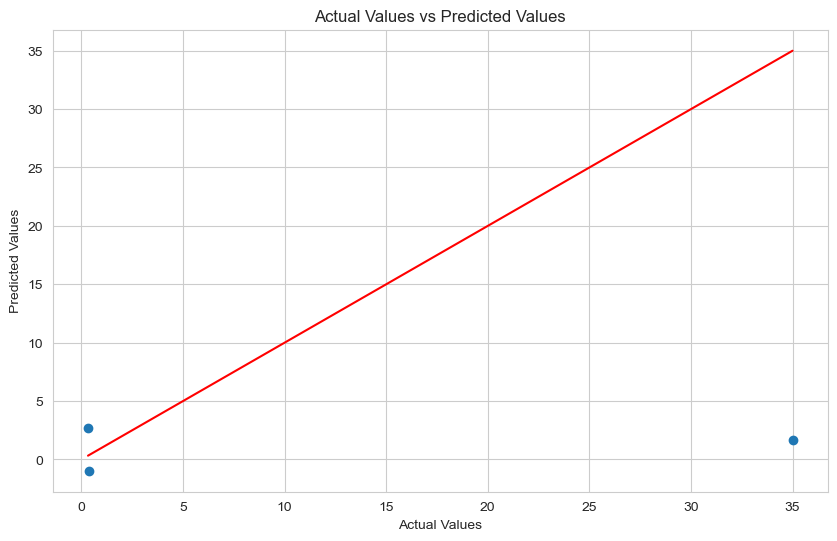

In [24]:
# We will predict the CO2 emissions (metric tons per capita) 
X = df.drop('CO2 emissions (metric tons per capita)', axis=1)
y = df['CO2 emissions (metric tons per capita)']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

# Import the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('The Mean Absolute Error is: {}'.format(mean_absolute_error(y_test, predictions)))
print('The Mean Squared Error is: {}'.format(mean_squared_error(y_test, predictions)))
print('The Root Mean Squared Error is: {}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.show();

In [25]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# pkl
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

-0.3985661008787633


In [26]:
# sAVE THE MODEL IN .pkl FORMAT
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

# Predict the CO2 emissions (metric tons per capita) for the year 2022
# The model will predict the CO2 emissions (metric tons per capita) for the year 2022
# The model will use the values of the other features for the year 2022 to make the prediction

In [ ]:
# Now we will create a sample views.py file for a django application if we will deploy
# the model as a web application

# Path: views.py
import pickle
import numpy as np
from django.shortcuts import render
from django.http import HttpResponse
from django.template import loader

# Create your views here.
def index(request):
    template = loader.get_template('index.html')
    return HttpResponse(template.render())

def predict(request):
    if request.method == 'POST':
        model = pickle.load(open('model.pkl', 'rb'))
        year = int(request.POST['year'])
        co2 = float(request.POST['co2'])
        school_enrollment_primary = float(request.POST['school_enrollment_primary'])
        school_enrollment_secondary = float(request.POST['school_enrollment_secondary'])
        electric_power_consumption = float(request.POST['electric_power_consumption'])
        prediction = model.predict([[year, co2, school_enrollment_primary, school_enrollment_secondary, electric_power_consumption]])
        prediction = np.round(prediction, 2)
        return render(request, 'index.html', {'prediction': prediction})
    else:
        return render(request, 'index.html', {})

# Now we will create a sample urls.py file for a django application if we will deploy
# the model as a web application

# Path: urls.py
from django.urls import path
from . import views

urlpatterns = [
    path('', views.index, name='index'),
    path('predict', views.predict, name='predict'),
]

# Now we will create a sample index.html file for a django application if we will deploy
# the model as a web application

# Path: index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Kenya World Bank Data (2013-2022)</title>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
</head>
<body>

<div class="container">
    <div class="jumbotron">
        <h2 class="text-center">Kenya World Bank Data (2013-2022)</h2>
    </div>
</div>

<div class="container">

    <form action="{% url 'predict' %}" method="post">

        {% csrf_token %}
        <div class="form-group">
            <label for="year">Year</label>
            <input type="text" class="form-control" id="year" name="year" placeholder="Enter Year">
        </div>
        <div class="form-group">
            <label for="co2">CO2 emissions (metric tons per capita)</label>
            <input type="text" class="form-control" id="co2" name="co2" placeholder="Enter CO2 emissions (metric tons per capita)">
        </div>
        <div class="form-group">
            <label for="school_enrollment_primary">School enrollment, primary (% gross)</label>
            <input type="text" class="form-control" id="school_enrollment_primary" name="school_enrollment_primary" placeholder="Enter School enrollment, primary (% gross)">
        </div>
        <div class="form-group">
            <label for="school_enrollment_secondary">School enrollment, secondary (% gross)</label>
            <input type="text" class="form-control" id="school_enrollment_secondary" name="school_enrollment_secondary" placeholder="Enter School enrollment, secondary (% gross)">
        </div>
        <div class="form-group">
            <label for="electric_power_consumption">Electric power consumption (kWh per capita)</label>
            <input type="text" class="form-control" id="electric_power_consumption" name="electric_power_consumption" placeholder="Enter Electric power consumption (kWh per capita)">
        </div>
        <button type="submit" class="btn btn-primary">Predict</button>
    </form>
    
        {% if prediction %}
        <div class="form-group">
            <label for="prediction">Prediction</label>
            <input type="text" class="form-control" id="prediction" name="prediction" value="{{ prediction }}">
        </div>
        {% endif %}